# Oakland Crime Statistics 2011 to 2016

#3数据可视化与摘要

##3.1数据摘要
在数据集Oakland Crime Statistics 2011 to 2016中，有2011年到2016年的数据，每年的数据为一个csv文件，此处我们以2016年的数据为例进行数据预处理。文件名为records-for-2015.csv，共有10个属性，其中标称属性有：Agency、Create Time、Location、Area Id、Beat、Incident Type Id、Incident Type Description、Event Number、Closed Time；数值属性有：Priority。
对于标称属性，将每个属性的频数按照从大到小排序，因为每个属性中的类别较多，在此取标称属性频数较大的前5项作为展示。输出如下所示，每列属性的频数统计输出为一个列表，其中列表的每一项为属性对应的值和该值对应的频数，按照频数从大到小排序。从输出中我们可以看到每个属性中频数较高的值，其中有的属性有许多空值。

In [44]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

path = 'C:/Users/ZL/Desktop/oakland-crime-statistics-2011-to-2016/records-for-2016.csv'
data = pd.read_csv(path, header=0,  engine='python', encoding='utf-8')
data = data.values
print('属性的值和频数如下所示：')
for i in range(data.shape[1]):  # 对所有列进行频数的统计
    counter = Counter(data[:, i])
    print(counter.most_common(5))  # 取前5项

属性的值和频数如下所示：
[('OP', 110827), (nan, 1)]
[('2016-05-06T11:21:13.000', 3), ('2016-01-01T11:56:04.000', 2), ('2016-01-05T15:14:57.000', 2), ('2016-01-06T15:35:57.000', 2), ('2016-01-07T09:35:00.000', 2)]
[(' INTERNATIONAL BLVD    ', 2156), (' AV&INTERNATIONAL BLVD    ', 1829), (' MACARTHUR BLVD    ', 1813), (' BROADWAY     ', 1472), (' 7TH ST    ', 1223)]
[('P3', 47425), ('P1', 41419), ('P2', 19610), ('POU', 2173), ('PCW', 194)]
[('04X', 4515), ('08X', 3931), ('26Y', 3511), ('30Y', 3473), ('19X', 3455)]
[(2.0, 86272), (1.0, 24555), (nan, 1)]
[('933R', 10094), ('415', 7883), ('SECCK', 7251), ('10851', 5308), ('911H', 5089)]
[('ALARM-RINGER', 10094), ('SECURITY CHECK', 7251), ('STOLEN VEHICLE', 5308), ('911 HANG-UP', 5089), ('MENTALLY ILL', 4859)]
[('LOP160101000003', 1), ('LOP160101000005', 1), ('LOP160101000008', 1), ('LOP160101000007', 1), ('LOP160101000009', 1)]
[('2016-05-29T00:43:38.000', 3), ('2016-01-02T20:07:50.000', 2), ('2016-01-03T00:56:37.000', 2), ('2016-01-03T23:01:41.000', 2

   对于数值属性，Priority的五数概括为1、2、2、2、2，缺失值的个数为0；

In [23]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

path = 'C:/Users/ZL/Desktop/oakland-crime-statistics-2011-to-2016/records-for-2016.csv'
data = pd.read_csv(path, header=0, engine='python', encoding='utf-8')
print(data.describe())  # 五数概括、有效个数、平均值等

            Priority
count  110827.000000
mean        1.778438
std         0.415299
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000


##1.2数据可视化
使用直方图进行数据的可视化。因为属性较多，此处我们以属性Area Id和Beat为例进行分析。
在直方图中列出了频数较大的值和频数，可以看到，对于属性Area Id，前几个值占据了大部分的数据；对于属性Beat，在所列直方图中每个值对应的频数差距并不大。

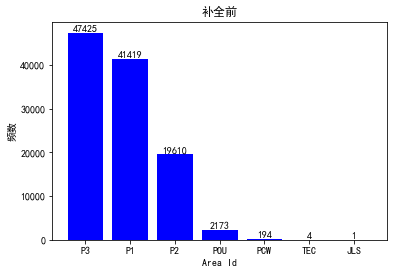

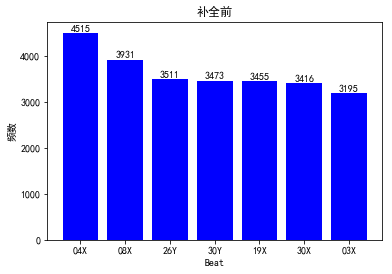

In [26]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
path = 'C:/Users/ZL/Desktop/oakland-crime-statistics-2011-to-2016/records-for-2016.csv'

def draw(data,cl,xlabel):
    num = 7
    data = data.values
    counter = Counter(data[:, cl])
    frequency = counter.most_common()  # 取前n项
    num_list = []
    name_list = []
    for i in range(num):
        num_list.append(int(frequency[i][1]))
        name_list.append(str(frequency[i][0]))
    fig, ax = plt.subplots()
    b = ax.bar(name_list, num_list)
    plt.bar(range(len(num_list)), num_list, color='blue', tick_label=name_list)
    for a, b in zip(name_list, num_list):
        ax.text(a, b + 1, b, ha='center', va='bottom')
    plt.title('补全前')
    plt.xlabel(xlabel)
    plt.ylabel('频数')
    plt.show()
data = pd.read_csv(path, header=0, engine='python', encoding='utf-8')
draw(data, 3, 'Area Id')
draw(data, 4, 'Beat')


#4数据缺失的处理
#4.1剔除缺失值
将存在缺失值的行进行剔除，结果如下所示，剔除后仅剩余39241行，说明有大量的数据行中存在缺失值。
剔除缺失值后，以属性Area Id的频数的直方图为例，与补全前的相比，可以看到，各个值的频数都有所降低。

剔除后总数据量：110247


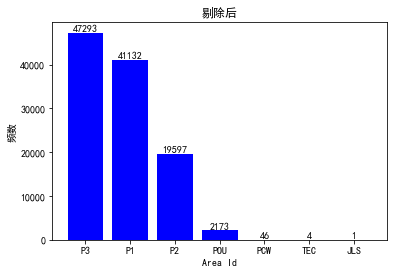

In [38]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
path = 'C:/Users/ZL/Desktop/oakland-crime-statistics-2011-to-2016/records-for-2016.csv'

def draw(data,cl,xlabel):
    num = 7
    data = data.values
    counter = Counter(data[:, cl])
    frequency = counter.most_common()  # 取前n项
    num_list = []
    name_list = []
    for i in range(num):
        num_list.append(int(frequency[i][1]))
        name_list.append(str(frequency[i][0]))
    fig, ax = plt.subplots()
    b = ax.bar(name_list, num_list)
    plt.bar(range(len(num_list)), num_list, color='blue', tick_label=name_list)
    for a, b in zip(name_list, num_list):
        ax.text(a, b + 1, b, ha='center', va='bottom')
    plt.title('剔除后')
    plt.xlabel(xlabel)
    plt.ylabel('频数')
    plt.show()
data = pd.read_csv(path, header=0,  engine='python', encoding='utf-8')
data_drop = data.dropna()  # 将缺失值所在行剔除
print('剔除后总数据量：'+str(data_drop.shape[0]))
draw(data_drop,3,'Area Id')

##4.2最高频率值填补
对于存在缺失值的属性，使用该属性中频率最高的值进行填补。
该数据集中共有10个属性，首先确定每个属性的频率最高的值。读取数据集，遍历数据集的每个属性，根据属性的值的频数进行排序，最大频数即为最大频率，在遍历过程中，如果频数最高的值为缺失值，那么取下一个频数最高的值。最终将10个属性的最高频率的值存储在列表中。
接下来将每个属性的缺失值替换为该属性频率最高的值。
补全后以Area Id属性为例可以看到，有效行数为150930行，和数据集中的总行数相同。
以最高频率值填补后，以属性Area Id的频数最大的前7项的直方图为例，可以看到，值为P3的频数增加，其他值的频数不变，因为该属性只有一个缺失值。

                   5
count  110828.000000
mean        1.778440
std         0.415298
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000


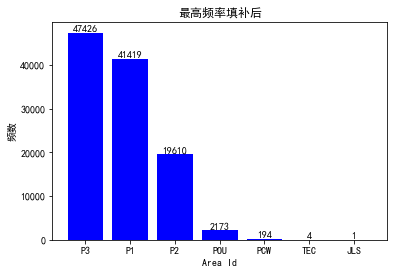

In [43]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
path = 'C:/Users/ZL/Desktop/oakland-crime-statistics-2011-to-2016/records-for-2016.csv'

def draw(data, cl, xlabel):
    num = 7
    data = data.values
    counter = Counter(data[:, cl])
    frequency = counter.most_common()  # 取前n项
    num_list = []
    name_list = []
    for i in range(num):
        num_list.append(int(frequency[i][1]))
        name_list.append(str(frequency[i][0]))
    fig, ax = plt.subplots()
    b = ax.bar(name_list, num_list)
    plt.bar(range(len(num_list)), num_list, color='blue', tick_label=name_list)
    for a, b in zip(name_list, num_list):
        ax.text(a, b + 1, b, ha='center', va='bottom')
    plt.title('最高频率填补后')
    plt.xlabel(xlabel)
    plt.ylabel('频数')
    plt.show()

    
data = pd.read_csv(path, header=0, engine='python', encoding='utf-8')
data = data.values
max_time = []  # 每个属性最大频数的值
# 确定每个属性最大频数的值
for cl in range(data.shape[1]):
    counter = Counter(data[:, cl])
    counter = counter.most_common()  # 排序，返回类型为list，list的每个元素为内容和频数
    if counter[0][0] == counter[0][0]:  # 如果最大频数不为空值
        max_time.append(counter[0][0])
    else:  # 如果最大频数为空值
        max_time.append(counter[1][0])
# 对每个属性的空值进行替换
data_max = pd.DataFrame(data)
for cl in range(data.shape[1]):
    data_max[cl] = data_max[cl].fillna(max_time[cl])
print(data_max.describe())
draw(data_max,3,'Area Id')